#Question 1

#Part 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

In [ ]:
X , y = make_moons(n_samples=1000,noise=0.3,random_state=42)

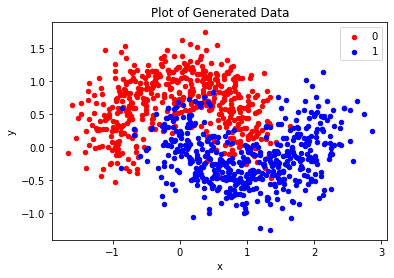

In [ ]:
df = pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
colors = {0:'red',1:'blue'}
fig , ax = plt.subplots()
grouped = df.groupby('label')
for key,group in grouped:
  group.plot(ax = ax, kind = 'scatter', x='x', y = 'y', label = key, color = colors[key])

plt.title("Plot of Generated Data")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.8933333333333333

Decision Boundary for Decision Tree Classifier:


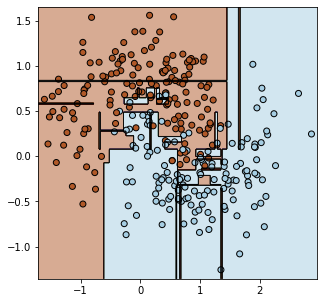

In [ ]:
def plot_db(clf,X,Y,cmap = 'Paired_r'):
  h = 0.01
  x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
  y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)

  plt.figure(figsize = (5,5))
  plt.contourf(xx,yy,z,cmap=cmap,alpha = 0.5)
  plt.contour(xx,yy,z,colors = 'k',linewidths = 0.3)
  plt.scatter(X[:,0],X[:,1],c = Y , cmap = cmap , edgecolors = 'k')

print("Decision Boundary for Decision Tree Classifier:")
plot_db(clf,X_test,y_test)

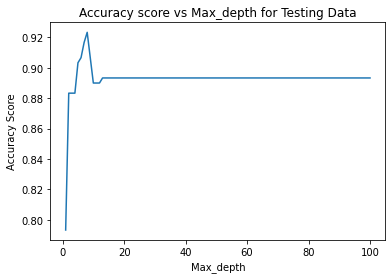

Accuracy score is maximum, when max_depth = 8.0


In [ ]:
x = np.linspace(1,100,100)
y_score = []

for max_d in range(1,101):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  val_score = model.score(X_test,y_test)
  Y_pred = model.predict(X_test)
  y_score.append(val_score)

y_score = np.array(y_score)
plt.plot(x,y_score)
plt.title("Accuracy score vs Max_depth for Testing Data")
plt.xlabel('Max_depth')
plt.ylabel('Accuracy Score')
plt.show()
print('Accuracy score is maximum, when max_depth =',x[np.where(y_score==y_score.max())[0][0]])

In [ ]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier

base_clf = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = base_clf,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9166666666666666

Decision Boundary for Bagging Classifier:


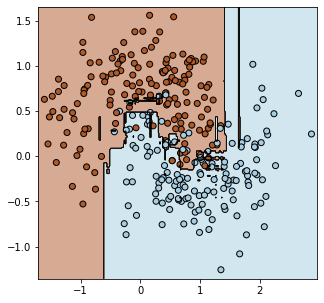

In [ ]:
print("Decision Boundary for Bagging Classifier:")
plot_db(model,X_test,y_test)

In [ ]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9133333333333333

Decision Boundary for RandomForest Classifier:


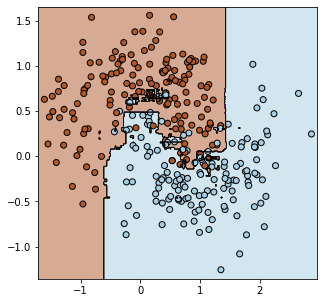

In [ ]:
print("Decision Boundary for RandomForest Classifier:")
plot_db(clf,X_test,y_test)

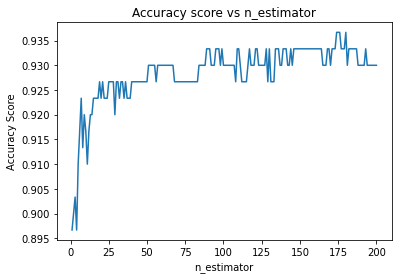

Accuracy score is maximum, when n_estimators = 174.0


In [ ]:
#parameter tuning for Bagging Classifier
x = np.linspace(1,200,200)
y_score = []

for n in range(1,201):
  model = BaggingClassifier(base_estimator = base_clf,n_estimators=n, random_state=42)
  model.fit(X_train, y_train)
  val_score = model.score(X_test,y_test)
  Y_pred = model.predict(X_test)
  y_score.append(val_score)

y_score = np.array(y_score)
plt.plot(x,y_score)
plt.title("Accuracy score vs n_estimator")
plt.xlabel('n_estimator')
plt.ylabel('Accuracy Score')
plt.show()
print('Accuracy score is maximum, when n_estimators =',x[np.where(y_score==y_score.max())[0][0]])

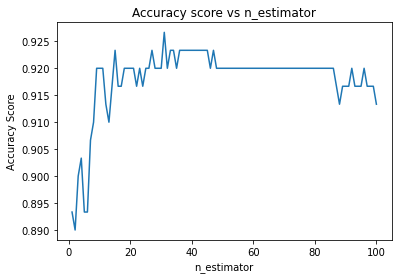

Accuracy score is maximum, when n_estimators = 31.0


In [ ]:
#parameter tuning for RandomForest Classifier
x = np.linspace(1,100,100)
y_score = []

for n in range(1,101):
  model = RandomForestClassifier(n_estimators = n,random_state=42)
  model.fit(X_train, y_train)
  val_score = model.score(X_test,y_test)
  Y_pred = model.predict(X_test)
  y_score.append(val_score)

y_score = np.array(y_score)
plt.plot(x,y_score)
plt.title("Accuracy score vs n_estimator")
plt.xlabel('n_estimator')
plt.ylabel('Accuracy Score')
plt.show()
print('Accuracy score is maximum, when n_estimators =',x[np.where(y_score==y_score.max())[0][0]])

In [ ]:
#Bagging Classifier with Optimum n_estimators
base_clf = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = base_clf,n_estimators = 174, random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9366666666666666

Decision Boundary for Bagging classifier with Optimum n_estimators = 174:


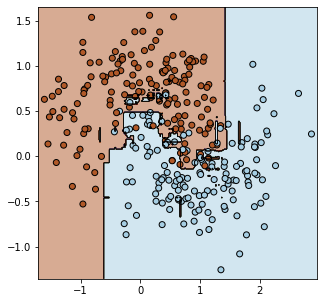

In [ ]:
print("Decision Boundary for Bagging classifier with Optimum n_estimators = 174:")
plot_db(model,X_test,y_test)

In [ ]:
#RandomForest Classifier with Optimum n_estimators
clf = RandomForestClassifier(n_estimators = 31 ,random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9266666666666666

Decision Boundary for RandomForest classifier with Optimum n_estimators = 31.0 :


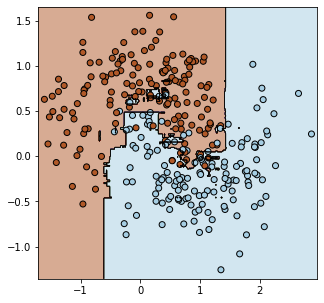

In [ ]:
print("Decision Boundary for RandomForest classifier with Optimum n_estimators = 31.0 :")
plot_db(clf,X_test,y_test)

#Bagging from scratch

In [ ]:
from collections import Counter

In [ ]:
class bagging:

  def __init__(self,n_estimators,*,max_depth=None,seed=None):
    #number of estimators
    self.n_estimators = n_estimators
    #max_depth of decision tree
    self.max_depth = max_depth
    #seed for random number generation
    self.seed = seed

  def fit(self,X_train,y_train):
    #total number of samples in datasets
    self.rows = X_train.shape[0]
    #models
    self.estimators = []
    np.random.seed(self.seed)
    for row in range(self.rows):
      #choosing a random sample
      sample = np.random.choice(np.arange(self.rows), size = self.rows, replace = True)
      #choosing feature and label according to sample
      X_train_row = X_train[sample]
      y_train_row = y_train[sample]
      #training decision tree classifier
      model = DecisionTreeClassifier(max_depth=self.max_depth)
      model.fit(X_train_row,y_train_row)
      #appending model
      self.estimators.append(model)
    
  def predict(self,X_test):
    #intializing prediction 
    y_pred = np.empty((len(self.estimators),len(X_test)))
    for ind,estimator in enumerate(self.estimators):
      #predicting the test data
      y_pred[ind] = estimator.predict(X_test)

    #Transpose of y_pred
    y_pred = y_pred.T
    #list for storing result
    y = []
    for i in range(len(X_test)):
      #counting occurence
      occurence_count = Counter(y_pred[i])
      #appending element with most occurence
      y.append(int(occurence_count.most_common(1)[0][0]))
    
    return y


In [ ]:
bagger = bagging(n_estimators=10)
bagger.fit(X_train,y_train)
y_pred = bagger.predict(X_test)
def accuracy(y_test,y_pred):
  return np.sum(y_test==y_pred)/len(y_test)

acc = accuracy(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9233333333333333


#Question 2

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Part 1

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

#Part 2

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(subsample=0.7)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#Part 3

In [ ]:
print("For AdaBoost Model:-")
print("Training Data Accuracy:", adaboost.score(X_train,y_train))
print("Testing Data Accuracy:", adaboost.score(X_test,y_test))
print("")
print("For XGBoost Model:-")
print("Training Data Accuracy:", xgb_model.score(X_train,y_train))
print("Testing Data Accuracy:", xgb_model.score(X_test,y_test))

For AdaBoost Model:-
Training Data Accuracy: 0.9485714285714286
Testing Data Accuracy: 0.9233333333333333

For XGBoost Model:-
Training Data Accuracy: 0.9957142857142857
Testing Data Accuracy: 0.9166666666666666


#Part 4

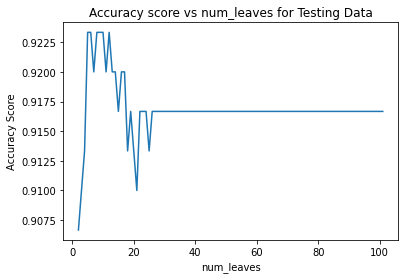

Accuracy score is maximum, when num_leaves = 5.0


In [ ]:
import lightgbm as lgb

x = np.linspace(2,101,100)
y_score = []

for n in range(2,102):
  model = lgb.LGBMClassifier(num_leaves=n)
  model.fit(X_train, y_train)
  val_score = model.score(X_test,y_test)
  Y_pred = model.predict(X_test)
  y_score.append(val_score)

y_score = np.array(y_score)
plt.plot(x,y_score)
plt.title("Accuracy score vs num_leaves for Testing Data")
plt.xlabel('num_leaves')
plt.ylabel('Accuracy Score')
plt.show()
print('Accuracy score is maximum, when num_leaves =',x[np.where(y_score==y_score.max())[0][0]])

#Part 5

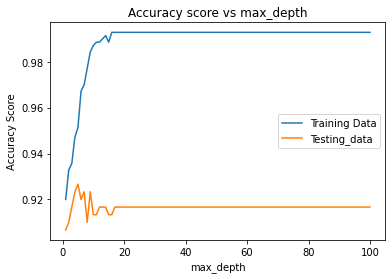

Accuracy score is maximum for testing data, when max_depth = 5.0


In [ ]:
import lightgbm as lgb

x = np.linspace(1,100,100)
y_score_train = []
y_score_test = []

for max_d in range(1,101):
  model = lgb.LGBMClassifier(max_depth=max_d)
  model.fit(X_train, y_train)
  val_score_train = model.score(X_train,y_train)
  val_score_test = model.score(X_test,y_test)
  y_score_test.append(val_score_test)
  y_score_train.append(val_score_train)


y_score_train = np.array(y_score_train)
y_score_test = np.array(y_score_test)
plt.plot(x,y_score_train,label='Training Data')
plt.plot(x,y_score_test,label='Testing_data')
plt.title("Accuracy score vs max_depth")
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
print('Accuracy score is maximum for testing data, when max_depth =',x[np.where(y_score_test==y_score_test.max())[0][0]])

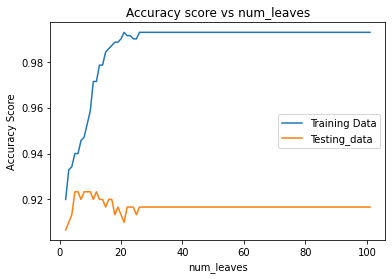

Accuracy score is maximum for testing data, when num_leaves = 5.0


In [ ]:
import lightgbm as lgb

x = np.linspace(2,101,100)
y_score_train = []
y_score_test = []

for n in range(2,102):
  model = lgb.LGBMClassifier(num_leaves=n)
  model.fit(X_train, y_train)
  val_score_train = model.score(X_train,y_train)
  val_score_test = model.score(X_test,y_test)
  y_score_test.append(val_score_test)
  y_score_train.append(val_score_train)


y_score_train = np.array(y_score_train)
y_score_test = np.array(y_score_test)
plt.plot(x,y_score_train,label='Training Data')
plt.plot(x,y_score_test,label='Testing_data')
plt.title("Accuracy score vs num_leaves")
plt.xlabel('num_leaves')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
print('Accuracy score is maximum for testing data, when num_leaves =',x[np.where(y_score_test==y_score_test.max())[0][0]])

#Part 7

Text(0.5, 1.0, 'Decision Boundary for AdaBoost Model')

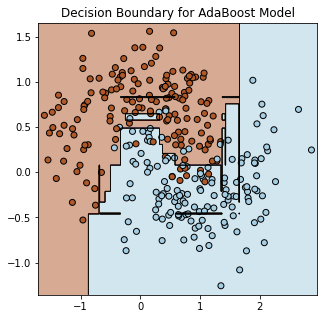

In [ ]:
#Adaboost Model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
plot_db(adaboost,X_test,y_test)
plt.title("Decision Boundary for AdaBoost Model")

Text(0.5, 1.0, 'Decision Boundary for XGBoost Model')

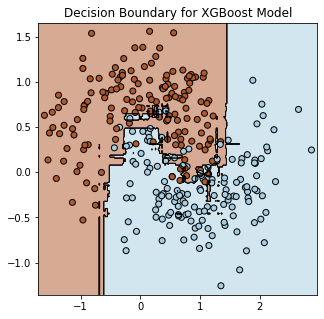

In [ ]:
#XGBoost Model
import xgboost as xgb

xgb_model = xgb.XGBClassifier(subsample=0.7)
xgb_model.fit(X_train,y_train)
plot_db(xgb_model,X_test,y_test)
plt.title("Decision Boundary for XGBoost Model")

0.9233333333333333


Text(0.5, 1.0, 'Decision Boundary for LightGBM model')

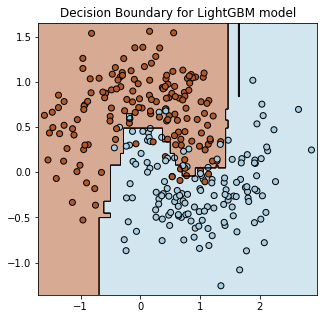

In [ ]:
#LightGBM model
lightgbm = lgb.LGBMClassifier(max_depth=5,num_leaves=5)
lightgbm.fit(X_train,y_train)
print(lightgbm.score(X_test,y_test))
plot_db(lightgbm,X_test,y_test)
plt.title("Decision Boundary for LightGBM model")

#Question 3

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],'priors': [[0.25, 0.75], [0.33, 0.67], [0.5, 0.5], [0.67, 0.33], [0.75, 0.25]]}
gnb = GaussianNB()
grid_search = GridSearchCV(gnb, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'priors': [0.5, 0.5], 'var_smoothing': 1e-09}


In [ ]:
gnb = GaussianNB(var_smoothing=1e-09,priors=[0.5,0.5])
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.8533333333333334

In [ ]:
#bagging classifier
base_clf = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator = base_clf,n_estimators = 174, random_state = 42)
bagging_clf.fit(X_train,y_train)
model.score(X_test,y_test)

0.9166666666666666

In [ ]:
#XGBoost Model
xgb_model = xgb.XGBClassifier(subsample=0.7)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

0.9166666666666666

In [ ]:
#AdaBoost Model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
adaboost.score(X_test,y_test)

0.9233333333333333

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('Gaussian Naive Bayes', gnb), ('Bagging', bagging_clf), ('XGBoost', xgb_model),('AdaBoost',adaboost)], voting='hard')
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test,y_test)

0.92